In [42]:
import numpy as np
from matplotlib import pyplot as plt

## Вариант 9. Касьянов Семен

## Постановка задачи
Решить систему уравнений с помощью LU-разложения и метода минимальных невязок с точность $10^{-3}$, сравнить результаты. Построить график ошибки (норма разности между точным и приближённым решением) и выбранного критерия останова на каждой итерации. Проверить строгое диагональное преобладание, решить задачу с нарушением диагонального преобладания (изменить коэффициенты матрицы). Построить график ошибки.



В качестве входных данных используем матрицы следующего вида:
$$ A = \begin{bmatrix}
-10.3 & 0 & -2.18 & 1.79 & 2.93 \\
0 & -8.53 & 1.3 & 2.61 & 3.83 \\
-2.18 & 1.3 & -11.07 & 3.42 & -2.27 \\
1.79 & 2.61 & 3.42 & -12.34 & 0 \\
2.93 & 3.83 & -2.27 & 0 & 9.2 \\

\end{bmatrix} \quad
b = \begin{bmatrix}
-33.41 \\
-63.34 \\
38.52 \\
41.76 \\
18.62 \\
\end{bmatrix}$$

Воспользуемся встроенным в $numpy$ методом для решения данной СЛАУ

In [43]:
A = np.array([[-10.3, 0, -2.18, 1.79, 2.93],
             [0, -8.53, 1.3, 2.61, 3.83],
             [-2.18, 1.3, -11.07, 3.42, -2.27],
             [1.79, 2.61, 3.42, -12.34, 0],
             [2.93, 3.83, -2.27, 0, 9.2]])

b = np.array([-33.41, -63.34, 38.52, 41.76, 18.62])
print(np.linalg.inv(A) @ b)

[ 3.  5. -4. -3. -2.]


Как мы видим точное решение имеет вид:
$$x = \begin{bmatrix}
3 \\
5 \\
-4 \\
-3 \\
-2 \\
\end{bmatrix}$$
Оно будет выступать в качестве ориентира при решении СЛАУ различными методами

## LU-разложение

Зададим две матрицы L и U, которые выступят основой метода LU-разложения

In [44]:
L = np.zeros((5, 5))
U = np.zeros((5, 5))

Воспользуемся алгоритмом для нахождения матриц L и U:
\begin{aligned}
& a_{11}=u_{11}, a_{12}=u_{12}, \ldots \\
& u_{i j}=a_{i j}-\sum_{k=1}^{i-1} l_{i k} u_{k j}, i \leq j ; \quad l_{i j}=u_{j j}^{-1}\left(a_{i j}-\sum_{k=1}^{j-1} l_{i k} u_{k j}\right), i>j
\end{aligned}

In [45]:
for i in range (5):
    L[i][i] = 1

for i in range (5):
    for j in range (5):
        if i <= j:
            sum = 0
            for k in range (i+1):
                sum += L[i][k] * U[k][j]
            U[i][j] = A[i][j] - sum

        else:
            sum = 0
            for k in range (j+1):
                sum += L[i][k] * U[k][j]
            L[i][j] = 1/U[j][j] * (A[i][j] - sum)



Посчитав матрицы L и U, сделаем обратный ход и вычислим сначала y, а затем x:

In [46]:
y = np.zeros([5,1])
y[0] = b[0]
x = np.zeros([5,1])
for i in range (1, 5):
    sum = 0
    for j in range (i):
        sum += y[j]*L[i][j]
    y[i] = b[i] - sum

In [47]:
x = np.zeros([5,1])
x[4] = y[4]/U[4][4]
for k in range (3, -1, -1):
    sum = 0
    for j in range (k+1, 5):
        sum += U[k][j] * x[j]
    x[k] = (1 / U[k][k]) * (y[k] - sum)
x

array([[ 3.],
       [ 5.],
       [-4.],
       [-3.],
       [-2.]])

Выведем полученные корни данной СЛАУ. Как можно увидеть, они совпали с теми, которые были посчитаны с помощью $\text{np.linalg}$

In [48]:
res = np.array([3, 5, -4, -3, -2])
res 

array([ 3,  5, -4, -3, -2])

## Метод минимальных невязок

## Метод
Для решения СЛАУ итерационным методом минимальных невязок мы используем следующие соотношения: \
\
$x_{k+1}=x_k-\tau_k\left(A x_k-f\right), r_k=A x_k-f$ \
\
$\tau_k=\frac{\left(A r_k, r_k\right)}{\left(A r_k, A r_k\right)}=\frac{\sum_{i=1}^n r_i^{(k)} \sum_{j=1}^n a_{i j} r_j^{(k)}}{\sum_{l=1}^n \sum_{i=1}^n a_{l i} r_i^{(k)} \sum_{j=1}^n a_{i j} r_j^{(k)}}$

Реализуем две функции: умножения матриц и вычисления нормы. В качестве нормы используем евклидову

In [49]:
def mulp (A, x):
    y = [0, 0, 0, 0, 0]
    for i in range (5):
        for j in range (5):
            y[i] += A[i][j] * x[j]
    y = np.array(y)
    return y

In [50]:
def norm (x):
    sum = 0
    for i in range (5):
        sum += x[i]**2
    return np.sqrt(sum)

Зададим начальное приближение ответа в виде столбца из нулей $x^{0}$ и рассчитаем $r^{0}$

In [51]:
x = np.array([0, 0, 0, 0, 0])
rk = mulp(A, x) - b
rk = np.array(rk)

Вычислим $\tau^{0} = A*x^{0} - b$

In [52]:
Ark = mulp(A, rk)
numerator = 0
denominator = 0
for i in range (5):
    numerator += Ark[i] * rk[i]
    denominator += Ark[i]**2
tao = numerator / denominator

Теперь зададим цикл, который итеративно будет считать приближенное решение по формуле $x^{k+1} = x^{k} - \tau^{k} * r^{k}$

In [53]:
xk = x
taok = tao
k = 0
error = [] # заполняем значением ошибки на каждой итерации
ostan = [] # заполняем значением невязки на каждой итерации
while norm(rk) > 0.001:
    ostan.append(norm(rk))
    error.append(norm(res - xk))
    k += 1
    xk = xk - taok*rk
    rk = mulp(A, xk) - b
    numerator = 0
    denominator = 0
    Ark = mulp(A, rk)
    for i in range (5):
        numerator += Ark[i] * rk[i]
        denominator += Ark[i]**2
    taok = numerator / denominator 
else:
    xk = xk - taok*rk
    
xk, k

(array([ 2.99999075,  5.00009346, -3.99992835, -2.99993003, -1.99997832]), 66)

Как видно, полученное с помощью метода минимальных невязок решение имеет следующий вид: 
$$ x = \begin{bmatrix}
2.99999075 \\
5.00009346 \\
-3.99992835 \\
-2.99993003 \\
-1.99997832 \\
\end{bmatrix}$$
Для его вычисления алгоритму понадобилось 67 итераций. \
\
Оно почти совпадает с точным решением СЛАУ. Если продолжить итерационный метод, то в конце концов алгоритм начнёт выдавать точное значение решения. \
\
Приведём ниже графики значений ошибки и нормы невязки на каждой итерации.

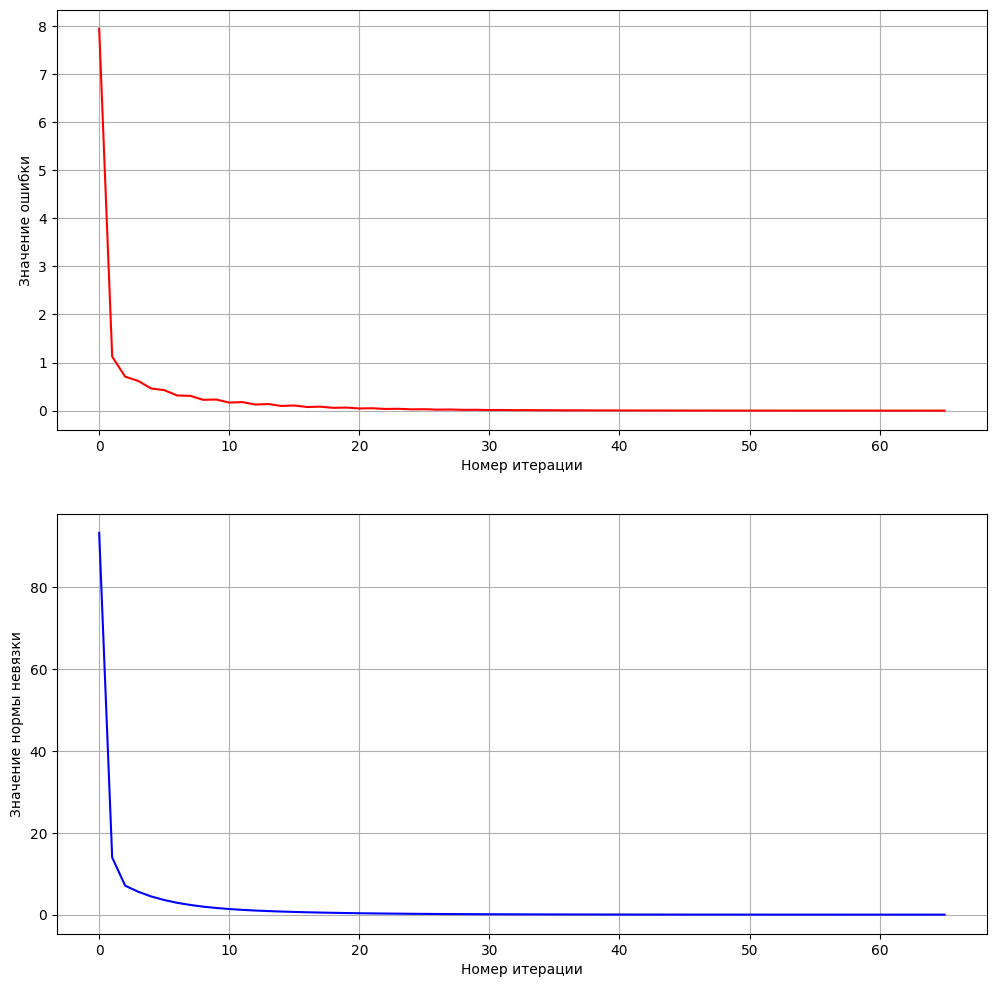

In [54]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize = (12,12))
plt.subplot(2, 1, 1)
plt.plot(error, c = 'red', label = 'Ошибка')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки')

plt.subplot(2, 1, 2)
plt.plot(ostan, c = 'blue', label = 'Критерий останова')
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение нормы невязки')
plt.show()


## Диагональное преобладание

Как можно увидеть, матрица А в данной работе обладает строим диагональным преобладанием. \
\
Его преимущество состоит в том, что итерационные методы решения СЛАУ с таким свойством сходятся к точному решению, которое существует и единственно. \
\
Попробуем нарушить его, изменив значения в матрице, а затем решим систему.

In [55]:
# Проверим диагональное преобладание с помощью цикла
k = 1
for i in range (5):
    sum = 0
    for j in range (5):
        if i != j:
            sum += abs(A[i][j])
    if abs(A[i][i]) < sum:
        k = 0
k

1

Действительно, матрица А обладает свойством диагонального преобладания

In [62]:
A = np.array([[-10.3, 50.74, -2.18, 1.79, 2.93],
             [27.61, -8.53, 1.3, 2.61, 3.83],
             [-2.18, 1.3, -11.07, 30.42, -2.27],
             [1.79, 81.61, 3.42, -12.34, 0],
             [2.93, 3.83, -2.27, 69.42, 9.2]])

Решение, которое может быть получено с помощью $numpy$ приведено ниже

In [57]:
res = np.linalg.inv(A) @ b
res

array([ -0.24876022,   0.6070297 ,   8.4812425 ,   2.94491589,
       -18.2782279 ])

Попробуем решить СЛАУ с помощью метода LU-разложения

In [65]:
L = np.zeros((5, 5))
U = np.zeros((5, 5))

for i in range (5):
    L[i][i] = 1

for i in range (5):
    for j in range (5):
        if i <= j:
            sum = 0
            for k in range (i+1):
                sum += L[i][k] * U[k][j]
            U[i][j] = A[i][j] - sum

        else:
            sum = 0
            for k in range (j+1):
                sum += L[i][k] * U[k][j]
            L[i][j] = 1/U[j][j] * (A[i][j] - sum)

y = np.zeros([5,1])
y[0] = b[0]
x = np.zeros([5,1])
for i in range (1, 5):
    sum = 0
    for j in range (i):
        sum += y[j]*L[i][j]
    y[i] = b[i] - sum

x = np.zeros([5,1])
x[4] = y[4]/U[4][4]
for k in range (3, -1, -1):
    sum = 0
    for j in range (k+1, 5):
        sum += U[k][j] * x[j]
    x[k] = (1 / U[k][k]) * (y[k] - sum)
x


array([[ -0.24876022],
       [  0.6070297 ],
       [  8.4812425 ],
       [  2.94491589],
       [-18.2782279 ]])

Как можно увидеть, решение совпало с ответом, полученным благодаря $numpy$

Попробуем решить новую СЛАУ с помощью метода минимальных невязок. Используем прежний алгоритм.

In [58]:
x = np.array([0, 0, 0, 0, 0])
rk = mulp(A, x) - b
rk = np.array(rk)
rk

array([ 33.41,  63.34, -38.52, -41.76, -18.62])

In [59]:
Ark = mulp(A, rk)
numerator = 0
denominator = 0
for i in range (5):
    numerator += Ark[i] * rk[i]
    denominator += Ark[i]**2
tao = numerator / denominator
tao

-0.001075956607833008

In [60]:
xk = x
taok = tao
k = 0
error = [] # заполняем значением ошибки на каждой итерации
ostan = [] # заполняем значением невязки на каждой итерации
for i in range (100):
    ostan.append(norm(rk))
    error.append(norm(res - xk))
    print(norm(res - xk), xk, taok)
    k += 1
    xk = xk - taok*rk
    rk = mulp(A, xk) - b
    numerator = 0
    denominator = 0
    Ark = mulp(A, rk)
    for i in range (5):
        numerator += Ark[i] * rk[i]
        denominator += Ark[i]**2
    taok = numerator / denominator 
else:
    xk = xk - taok*rk

20.37468983879487 [0 0 0 0 0] -0.001075956607833008
20.37911894199815 [ 0.03594771  0.06815109 -0.04144585 -0.04493195 -0.02003431] -0.00021282864521213128
20.3794067508933 [ 0.04370509  0.08166641 -0.04982541 -0.05253443 -0.02460227] -4.330806182705924e-05
20.379444290937563 [ 0.04530948  0.08441881 -0.05153606 -0.05403025 -0.02555242] -8.861265872469803e-06
20.379451118535773 [ 0.04563884  0.08498208 -0.0518863  -0.05433418 -0.02574766] -1.8151255691268067e-06
20.379452481505172 [ 0.04570634  0.08509746 -0.05195805 -0.05439635 -0.02578768] -3.718917120775395e-07
20.379452759265178 [ 0.04572018  0.0851211  -0.05197275 -0.05440908 -0.02579588] -7.619852829872675e-08
20.379452816114036 [ 0.04572301  0.08512595 -0.05197576 -0.05441169 -0.02579757] -1.5612800758794042e-08
20.37945282775953 [ 0.04572359  0.08512694 -0.05197638 -0.05441223 -0.02579791] -3.1990122420236326e-09
20.379452830145546 [ 0.04572371  0.08512714 -0.05197651 -0.05441234 -0.02579798] -6.554674956705678e-10
20.379452830

Выше в ходе каждой итерации выводились следующие данные: $||x - x^{k}||, \quad x^{k}, \quad \tau^{k}$

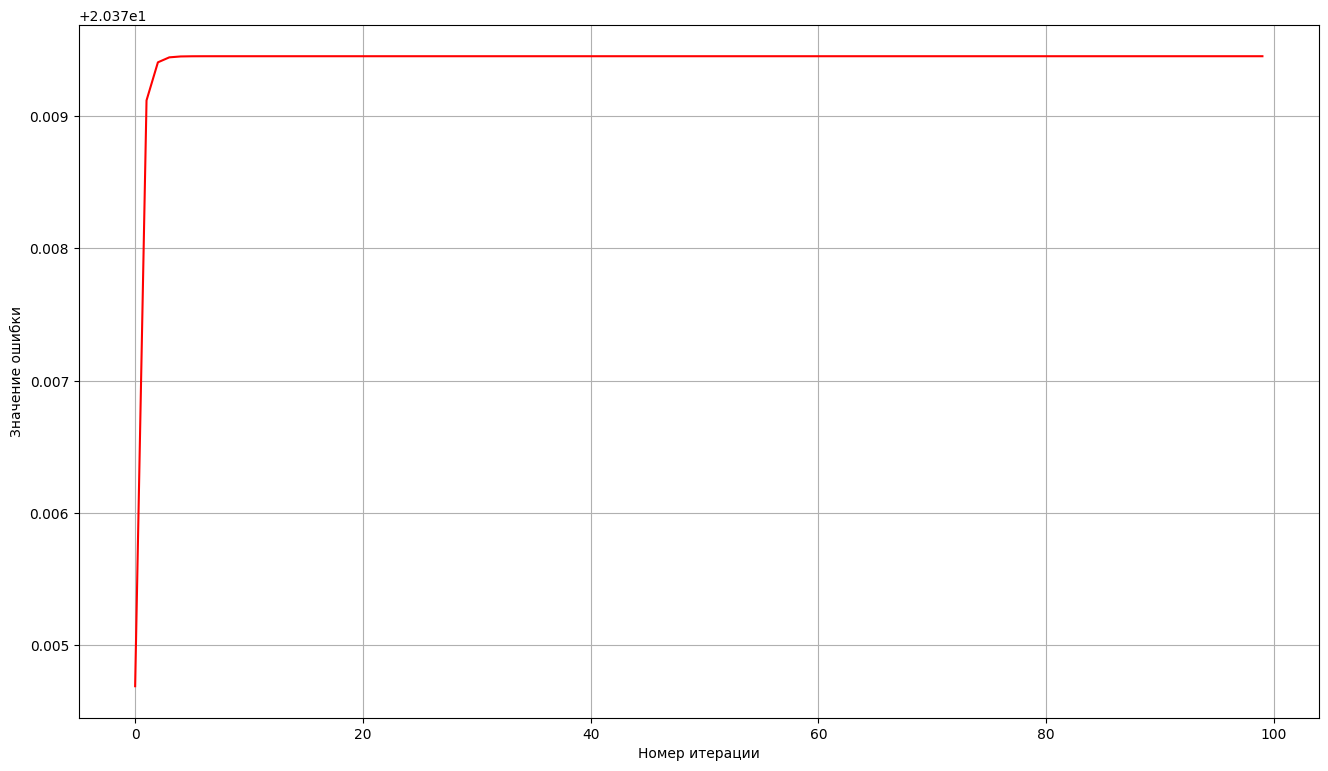

In [61]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.grid()
plt.xlabel('Номер итерации')
plt.ylabel('Значение ошибки')
plt.plot(error, c = 'red')
plt.show()

Как можно увидеть, метод минимальных невязок "не справился" с данной СЛАУ, так как мы нарушили условие диагонального преобладания. Было проведено 100 итераций алгоритма, в ходе которых ошибка алгоритма почти не изменилась, что можно увидеть из графика. Также по выведенным в ходе каждой итерации алгоритма данным видно, что величина $\tau^{k}$ стремится к 0. Это и приводит к тому, что решение и ошибка всё меньше меняются с каждой итерацией.